In [1]:
import pprint
import numpy as np
import seaborn as sns

from utils import Utils
from pipeline import HsiPipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
##
#
folder = '/media/koda/New Disk/Code/bacteria/atccs/plastico_B'
samples_dict = Utils.get_dict(samples=Utils.load_samples(folder))

pprint.pprint(samples_dict)

{'Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747': [1],
 'Enterobactercloacal_HMFFTA_Plastico_B_180926-103027': [2],
 'Escherichiacoli_25922_Plastico_B_180926-102054': [3],
 'Escherichiacoli_8739_Plastico_B_180926-102437': [4],
 'Klebsielapneumonial_700603_Plastico_B_180926-105913': [5],
 'Proteusmirabilis_9433_Plastico_B_180926-103336': [6],
 'Salmonellaspp_10708_Plastico_B_180926-104803': [7],
 'Salmonellatyphymierium_14028_Plastico_B_180926-104354': [8],
 'Serratiamarcences_14765_Plastico_B_180926-105123': [9]}


In [3]:
pipeline = HsiPipeline(data_folder=folder, samples=samples_dict)

In [5]:
pipeline.process_images()

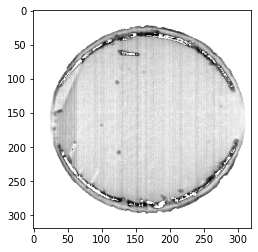

In [4]:
pipeline.visualize_images()

In [5]:
X_train, X_test, y_train, y_test, target_names = pipeline.get_Xy(case=0, spectral_range=(1, 241))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(270874, 240) (270877, 240)
(270874,) (270877,)


In [6]:
models_file = 'models_pipeline_01.joblib'
print(models_file)

models_pipeline_01.joblib


In [7]:
from sklearn import (
    discriminant_analysis,
)

seed = 42
models =[
    discriminant_analysis.LinearDiscriminantAnalysis(covariance_estimator=None, 
                                                     n_components=None,
                                                     priors=None, shrinkage=None, 
                                                     solver='svd',store_covariance=False,
                                                     tol=0.0001),
    discriminant_analysis.QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, 
                                                        store_covariance=False, 
                                                        tol=0.0001),
    ]

for model in models:
    print(model.__class__.__name__)

LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis


LinearDiscriminantAnalysis
                                                                 precision    recall  f1-score   support

Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747       0.74      0.78      0.76     30077
            Enterobactercloacal_HMFFTA_Plastico_B_180926-103027       0.97      0.93      0.95     30588
                 Escherichiacoli_25922_Plastico_B_180926-102054       0.92      0.92      0.92     31323
                  Escherichiacoli_8739_Plastico_B_180926-102437       0.91      0.79      0.85     29478
            Klebsielapneumonial_700603_Plastico_B_180926-105913       0.89      0.91      0.90     30004
                 Proteusmirabilis_9433_Plastico_B_180926-103336       0.83      0.84      0.84     30149
                   Salmonellaspp_10708_Plastico_B_180926-104803       0.89      0.87      0.88     29415
          Salmonellatyphymierium_14028_Plastico_B_180926-104354       0.74      0.89      0.81     29979
               Serratiamarc

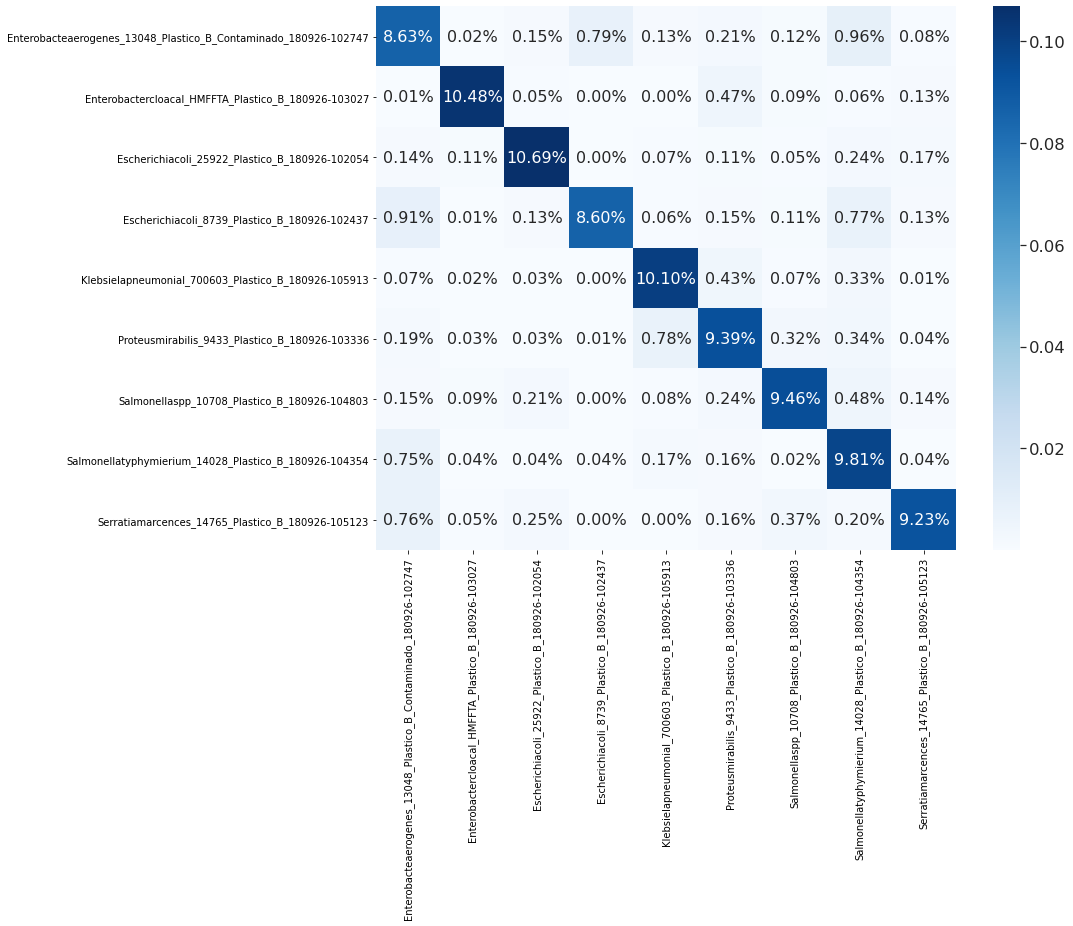

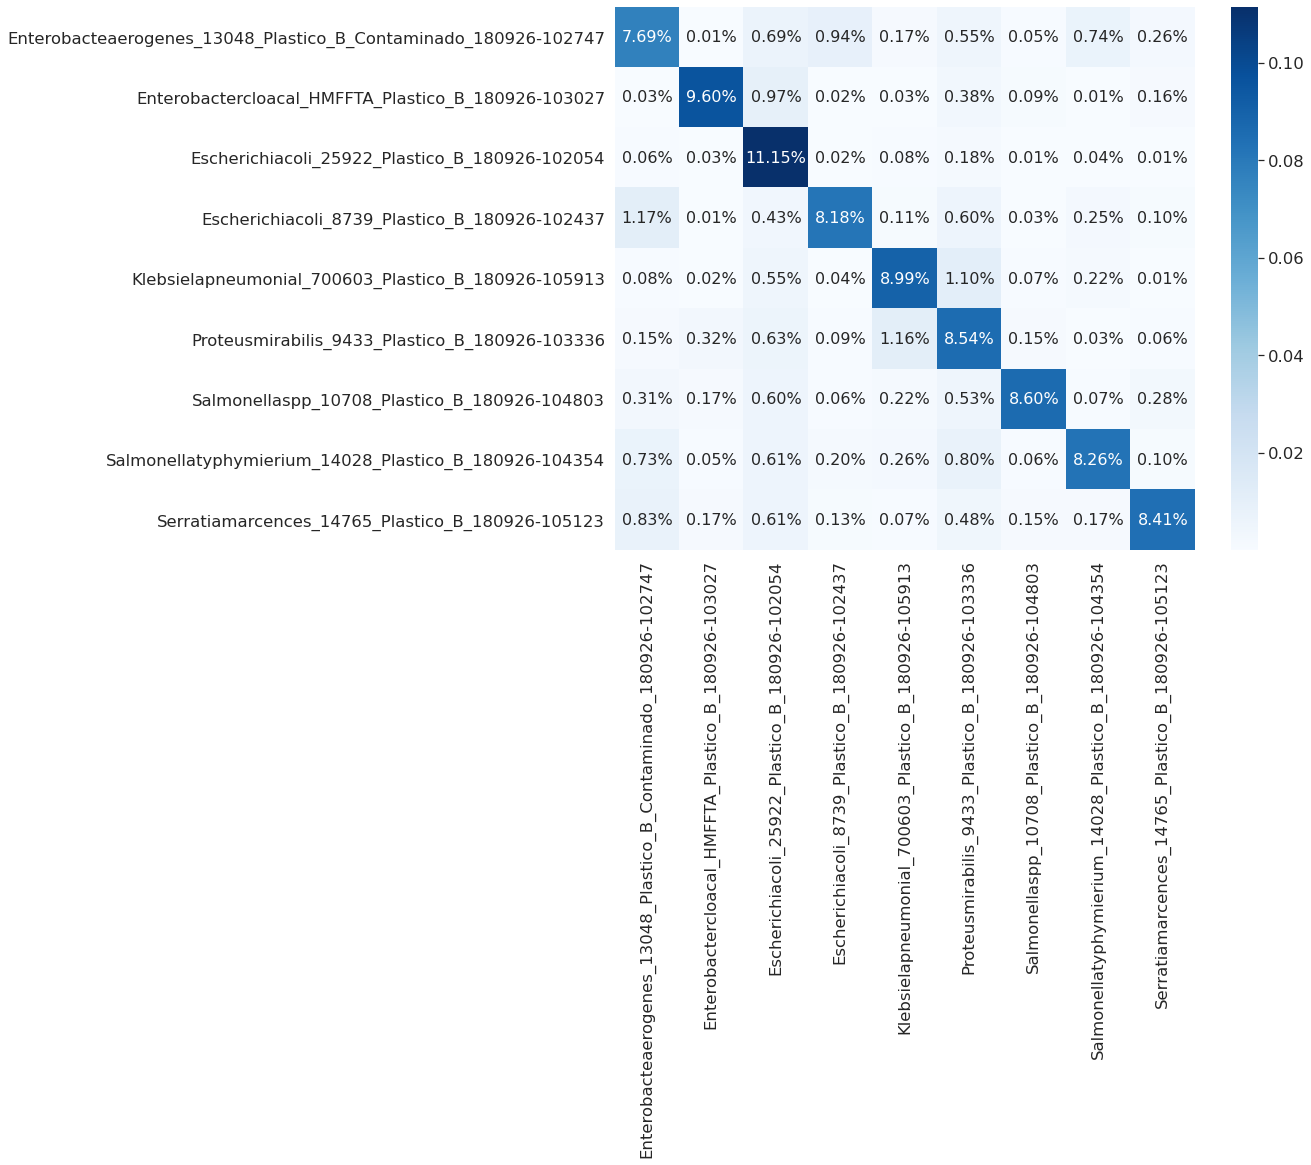

In [8]:
"""
    Everything will be saved in out_dir
"""

out_dir = 'outputs'
pipeline.train_models(x_train=X_train, 
                      x_test=X_test, 
                      y_train=y_train, 
                      y_test=y_test, 
                      models=models,
                      samples_dict=samples_dict,
                      target_names=target_names,
                      models_file=models_file,
                      work_dir=out_dir)